# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('position_salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape((len(y), 1))

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [6]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR on the whole dataset

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Oggy\.conda\envs\learning\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Applying the SVR model to predict new values

In [9]:
X_test = [[6.5]]
y_test = regressor.predict(sc_X.transform(X_test))
y_test = y_test.reshape(-1, 1)
sc_y.inverse_transform(y_test)

array([[170370.0204065]])

## Visualising the results from SVR model

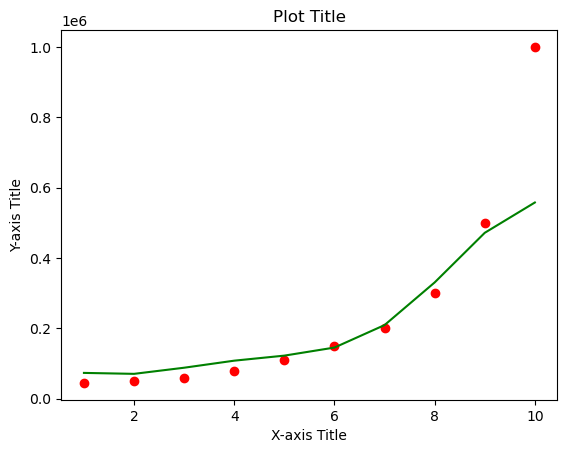

In [10]:
X_rev = sc_X.inverse_transform(X)
y_rev = sc_y.inverse_transform(y)

y_pred = regressor.predict(X)
y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred)

plt.scatter(X_rev, y_rev, color = 'red')
plt.plot(X_rev, y_pred, color = 'green')
plt.title('Plot Title')
plt.xlabel('X-axis Title')
plt.ylabel('Y-axis Title')
plt.show()

## Visualising the results from SVR model (higher resolutuon curve)

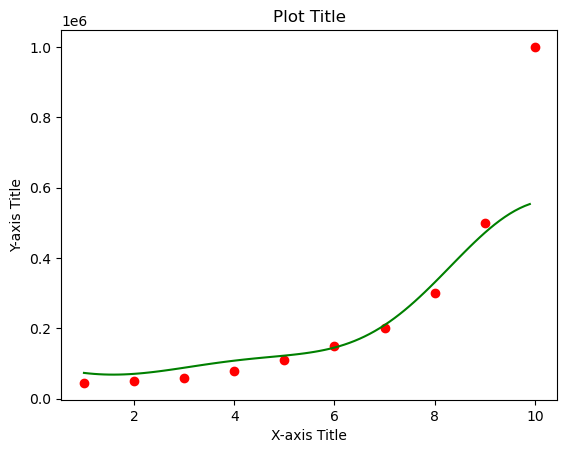

In [11]:
X_grid = np.arange(min(X_rev), max(X_rev), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid_transformed = sc_X.transform(X_grid)

y_pred_grid = regressor.predict(X_grid_transformed)
y_pred_grid = y_pred_grid.reshape(-1, 1)
y_pred_grid = sc_y.inverse_transform(y_pred_grid)

plt.scatter(X_rev, y_rev, color = 'red')
plt.plot(X_grid, y_pred_grid, color = 'green')
plt.title('Plot Title')
plt.xlabel('X-axis Title')
plt.ylabel('Y-axis Title')
plt.show()